# NLP - Comments About Home Office #




**Importação de Bibliotecas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#NLTK - Biblioteca utilizada para pré processamento dos textos, diagramas, frequências de palavras, etc.

#Setar stopwords da língua portuguesa
from nltk.corpus import stopwords
stopwords = set(stopwords.words("portuguese"))

# Para montar diagramas ou nuvem de etiquetas (wordclouds)
from wordcloud import WordCloud

#Distribuição de frequência de palavras
from nltk.probability import FreqDist

# Análise de sentimentos do texto
from textblob import TextBlob


### Configuração dos gráficos ###

In [2]:
font_title = {'family': 'DejaVu Sans',
        'color':  'white',
        'weight': 'bold',
        'size': 26,
        }

#estilo do gráfico - Gráficos e imagens com fundo escuro
#plt.style.use('dark_background')
sns.set_style('darkgrid')

#from pylab import rcParams
#plt.rcParams['figure.figsize'] = [12, 8]



plt.rcParams.update({'font.size': 22})

#permite manipulação inline dos gráficos gerados pelo matplotlib
%matplotlib inline

## Pré-processamento dos dados ##


A importação dos dados se dá utilizando o pandas.read_json() -> Alguns formalismos para tratamento de textdata tratam esse tipo de dataset como um corpus na biblioteca nltk, no entanto prefiro tratá-los utilizando o pandas devido à familiaridade que possuo com a biblioteca.

In [3]:
df = pd.read_json("03092020_2kcomments.json").rename(columns={0:"original"})
df.head()

original
0           Satisfação, não deixam nada a desejar...
1  Não tive dificuldade de me comunicar com outro...
2  No momento, não estou trabalhando em casa, e s...
3                                    No momento não.
4        Qualidade de vinda e rendimento no trabalho

### Tokenização ###

Primeiro quero deixar todas as palavras em lowcase e também desejo retirar a pontuação para tornar as palavras mais uniformes e auxiliar nos processos de análise exploratória de dados ou nas fases seguintes, não são necessários para análise.

A literatura refere-se a esse procedimento como **tokenization**.

In [4]:
token = lambda x: x.lower().replace(",","").replace(".","").replace(")","").replace("(","").replace("!","").replace("?","").replace("-"," ").replace("_"," ").replace('"','').replace("'","").replace("/","").split()
#remove toda pontuação colocada e em seguida separa a string em um array

In [5]:
#aplicar função lambda a todos elementos da Série
df["tokenized"]=df["original"].apply(token)
df.head()

original  \
0           Satisfação, não deixam nada a desejar...   
1  Não tive dificuldade de me comunicar com outro...   
2  No momento, não estou trabalhando em casa, e s...   
3                                    No momento não.   
4        Qualidade de vinda e rendimento no trabalho   

                                           tokenized  
0        [satisfação, não, deixam, nada, a, desejar]  
1  [não, tive, dificuldade, de, me, comunicar, co...  
2  [no, momento, não, estou, trabalhando, em, cas...  
3                                 [no, momento, não]  
4  [qualidade, de, vinda, e, rendimento, no, trab...

### Remover stopwords ###

Algumas palavras não são necessárias para a análise posterior, portanto vamos removê-las. Essas palavras são por exemplo, **pronomes, artigos, etc.**, e possuem apenas carater gramátical.
Nesse passo vamos remover as stopwords em **tokenized** e em **semPontuação**.

In [6]:
stopRemoveTK = lambda x: [palavra for palavra in x if palavra not in stopwords]

df["tokenized"]=df["tokenized"].apply(stopRemoveTK)
df.head()


original  \
0           Satisfação, não deixam nada a desejar...   
1  Não tive dificuldade de me comunicar com outro...   
2  No momento, não estou trabalhando em casa, e s...   
3                                    No momento não.   
4        Qualidade de vinda e rendimento no trabalho   

                                           tokenized  
0                [satisfação, deixam, nada, desejar]  
1  [dificuldade, comunicar, outros, membros, banc...  
2  [momento, trabalhando, casa, sim, quarentena, ...  
3                                          [momento]  
4           [qualidade, vinda, rendimento, trabalho]

Por conveniência definirei uma coluna "sem Pontuação" para utilizar alguns recursos mais tarde.

In [7]:
df["semPontuação"] = df["tokenized"].apply(lambda x: " ".join(x))
df.head()

original  \
0           Satisfação, não deixam nada a desejar...   
1  Não tive dificuldade de me comunicar com outro...   
2  No momento, não estou trabalhando em casa, e s...   
3                                    No momento não.   
4        Qualidade de vinda e rendimento no trabalho   

                                           tokenized  \
0                [satisfação, deixam, nada, desejar]   
1  [dificuldade, comunicar, outros, membros, banc...   
2  [momento, trabalhando, casa, sim, quarentena, ...   
3                                          [momento]   
4           [qualidade, vinda, rendimento, trabalho]   

                                        semPontuação  
0                     satisfação deixam nada desejar  
1  dificuldade comunicar outros membros banco sen...  
2  momento trabalhando casa sim quarentena plantã...  
3                                            momento  
4                qualidade vinda rendimento trabalho

## EDA - Conjuntos de Textos ##

A estratégia aqui é realizar uma análise exploratória dos dados de texto, o que inicialmente causa impacto devido à idéia de juntar texto e estatística, mas logo percebemos que o texto como um todo apresenta uma estrutura "macrotextual" que é composta por diversos elementos "microtextuais" que apresentam carater estatístico e nos permitem uma análise quantitativa do texto.

### Tamanho dos textos ###

Contar a quantidade de palavras que compõem cada texto -> Sem contar as stopwords

In [8]:
df["tamanho"] = df["tokenized"].apply(lambda x: len(x))
df.head()

original  \
0           Satisfação, não deixam nada a desejar...   
1  Não tive dificuldade de me comunicar com outro...   
2  No momento, não estou trabalhando em casa, e s...   
3                                    No momento não.   
4        Qualidade de vinda e rendimento no trabalho   

                                           tokenized  \
0                [satisfação, deixam, nada, desejar]   
1  [dificuldade, comunicar, outros, membros, banc...   
2  [momento, trabalhando, casa, sim, quarentena, ...   
3                                          [momento]   
4           [qualidade, vinda, rendimento, trabalho]   

                                        semPontuação  tamanho  
0                     satisfação deixam nada desejar        4  
1  dificuldade comunicar outros membros banco sen...       12  
2  momento trabalhando casa sim quarentena plantã...       10  
3                                            momento        1  
4                qualidade vinda rendimento trabalho        4

## Distribuição de Frequência das Palavras ##

Aqui a idéia é analisar todos as palavras contidas no dataset e montar uma distribuição de frequência. Nesse caso vou criar um dataFrame usando o nltk.probability.FreqDist, que é o objeto que criaremos utilizando a classe FreqDist da biblioteca nltk.

In [9]:
# Lista que receberá todas as palavras do DataSet

stringTotal = []

# Preencher a lista com as palavras tokenizadas

for i, x in df.iterrows():
    stringTotal = stringTotal + x["tokenized"]
#infelizmente eu só descobri outros métodos para remoção de pontuação após desenvolver essa parte do programa, então
# mantive o código antigo/manual
Freq = FreqDist(stringTotal)
Freq

#Vou setar um DataSet a partir do dictionary de frequências
FreqData = pd.DataFrame.from_dict(dict(Freq),orient="index")

# Transformar o indice em coluna
FreqData = FreqData.reset_index()

# renomear colunas

FreqData = FreqData.rename(columns={0:"frequencia","index":"palavra"})
FreqData.head()

palavra  frequencia
0   satisfação           5
1       deixam           3
2         nada          32
3      desejar           6
4  dificuldade          47

In [10]:
plt.figure(figsize=(25,10))
plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=24)
plt.title("Frequencia das palavras",fontsize=40)
#plt.plot(FreqData["palavras"].iloc[0:20].values,FreqData["frequencia"].iloc[0:20].values)
Freq.plot(20,cumulative=False,color="red")

A palavra mais incidente é trabalho, em conjunto com empresa, remoto, trabalhar, home, office, momento. A partir dessa análise bem simples já conseguimos identificar algum aspecto do texto. Aparenta ser algo relacionado a home office.

In [11]:
maisRepetida = FreqData[FreqData["frequencia"]==FreqData["frequencia"].max()]["palavra"]
menosRepetida = FreqData[FreqData["frequencia"]==FreqData["frequencia"].min()]["palavra"]
print("Mais repetida:\n {}\n\n\n\nMenos repetidas:\n {}".format(maisRepetida,menosRepetida))

Mais repetida:
 25    trabalho
Name: palavra, dtype: object



Menos repetidas:
 21           plantão
23      necessitarem
24           retorne
32           avançar
36            guarde
            ...     
5732    trabalhassem
5733           abril
5734            mãos
5735    descolamento
5736         recebeu
Name: palavra, Length: 3140, dtype: object


Ou seja, nosso conjunto possui um grupo de palavras comuns menor que o grupo de palavras que aparecem uma única vez.

## "Módulo" dos textos ##

Chamei essa parte da análise de módulo dos textos pois aqui analisamos o "tamanho" de cada texto a partir da quantidade de palavras que compõem cada um deles.
Esse é um aspecto bem simples mas que pode ser relevante para futuras análises, analisaremos a média da quantidade de palavras (sem stopwords).

In [12]:
# Retorna a média do tamanho dos textos

meanTamanho = df["tamanho"].mean()
stdTamanho = df["tamanho"].std()
print("Média: {}\nDesvio Pad: {}".format(meanTamanho,stdTamanho))

Média: 15.342
Desvio Pad: 13.553150185103476


Daqui verificamos que $\mu\approx 14$ e $\sigma\approx 14$ e isso indica fortemente que os dados não obedecem a uma distribuição normal, ou seja, os dados estão distribuídos em torno de $14$ e há uma forte dispersão entre eles.

### Countplot - Módulo ###

Podemos verificar como esses dados estão distribuídos a partir de uma análise gráfica

In [13]:
#Configurar o gráfico usando matplotlib.pyplot
plt.figure(figsize=(15,25))
plt.xticks(fontsize=24)#, rotation=90)
plt.yticks(fontsize=14)
plt.title("Módulo dos textos",fontsize=40)

# plotar o countplot usando seaborn

sns.countplot(y="tamanho",data=df)

# WordMap #

Podemos realizar uma análise mais visual do conjunto de dados através de wordmaps, isso nos dará mais uma dica sobre o que se tratam os dados.

In [14]:
# Configurar o gráfico usando matplotlib.pyplot
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
# Setar o wordcloud
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="plasma",stopwords=stopwords).generate(str(df["semPontuação"].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')


(-0.5, 2999.5, 1999.5, -0.5)

Agora analisamos outros wordclouds com menos textos, verificando o que ocorre quando deixamos textos mais textos maiores ou menores.
Para isso vou fazer 3 diagramas:

**1º: $len \leq 51$**

**2º: $51 \leq len \leq 119 $**

**3º: $119 \leq len \leq 204$**

In [15]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="plasma",stopwords=stopwords).generate(str(df["semPontuação"][df["tamanho"]<=51].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

(-0.5, 2999.5, 1999.5, -0.5)

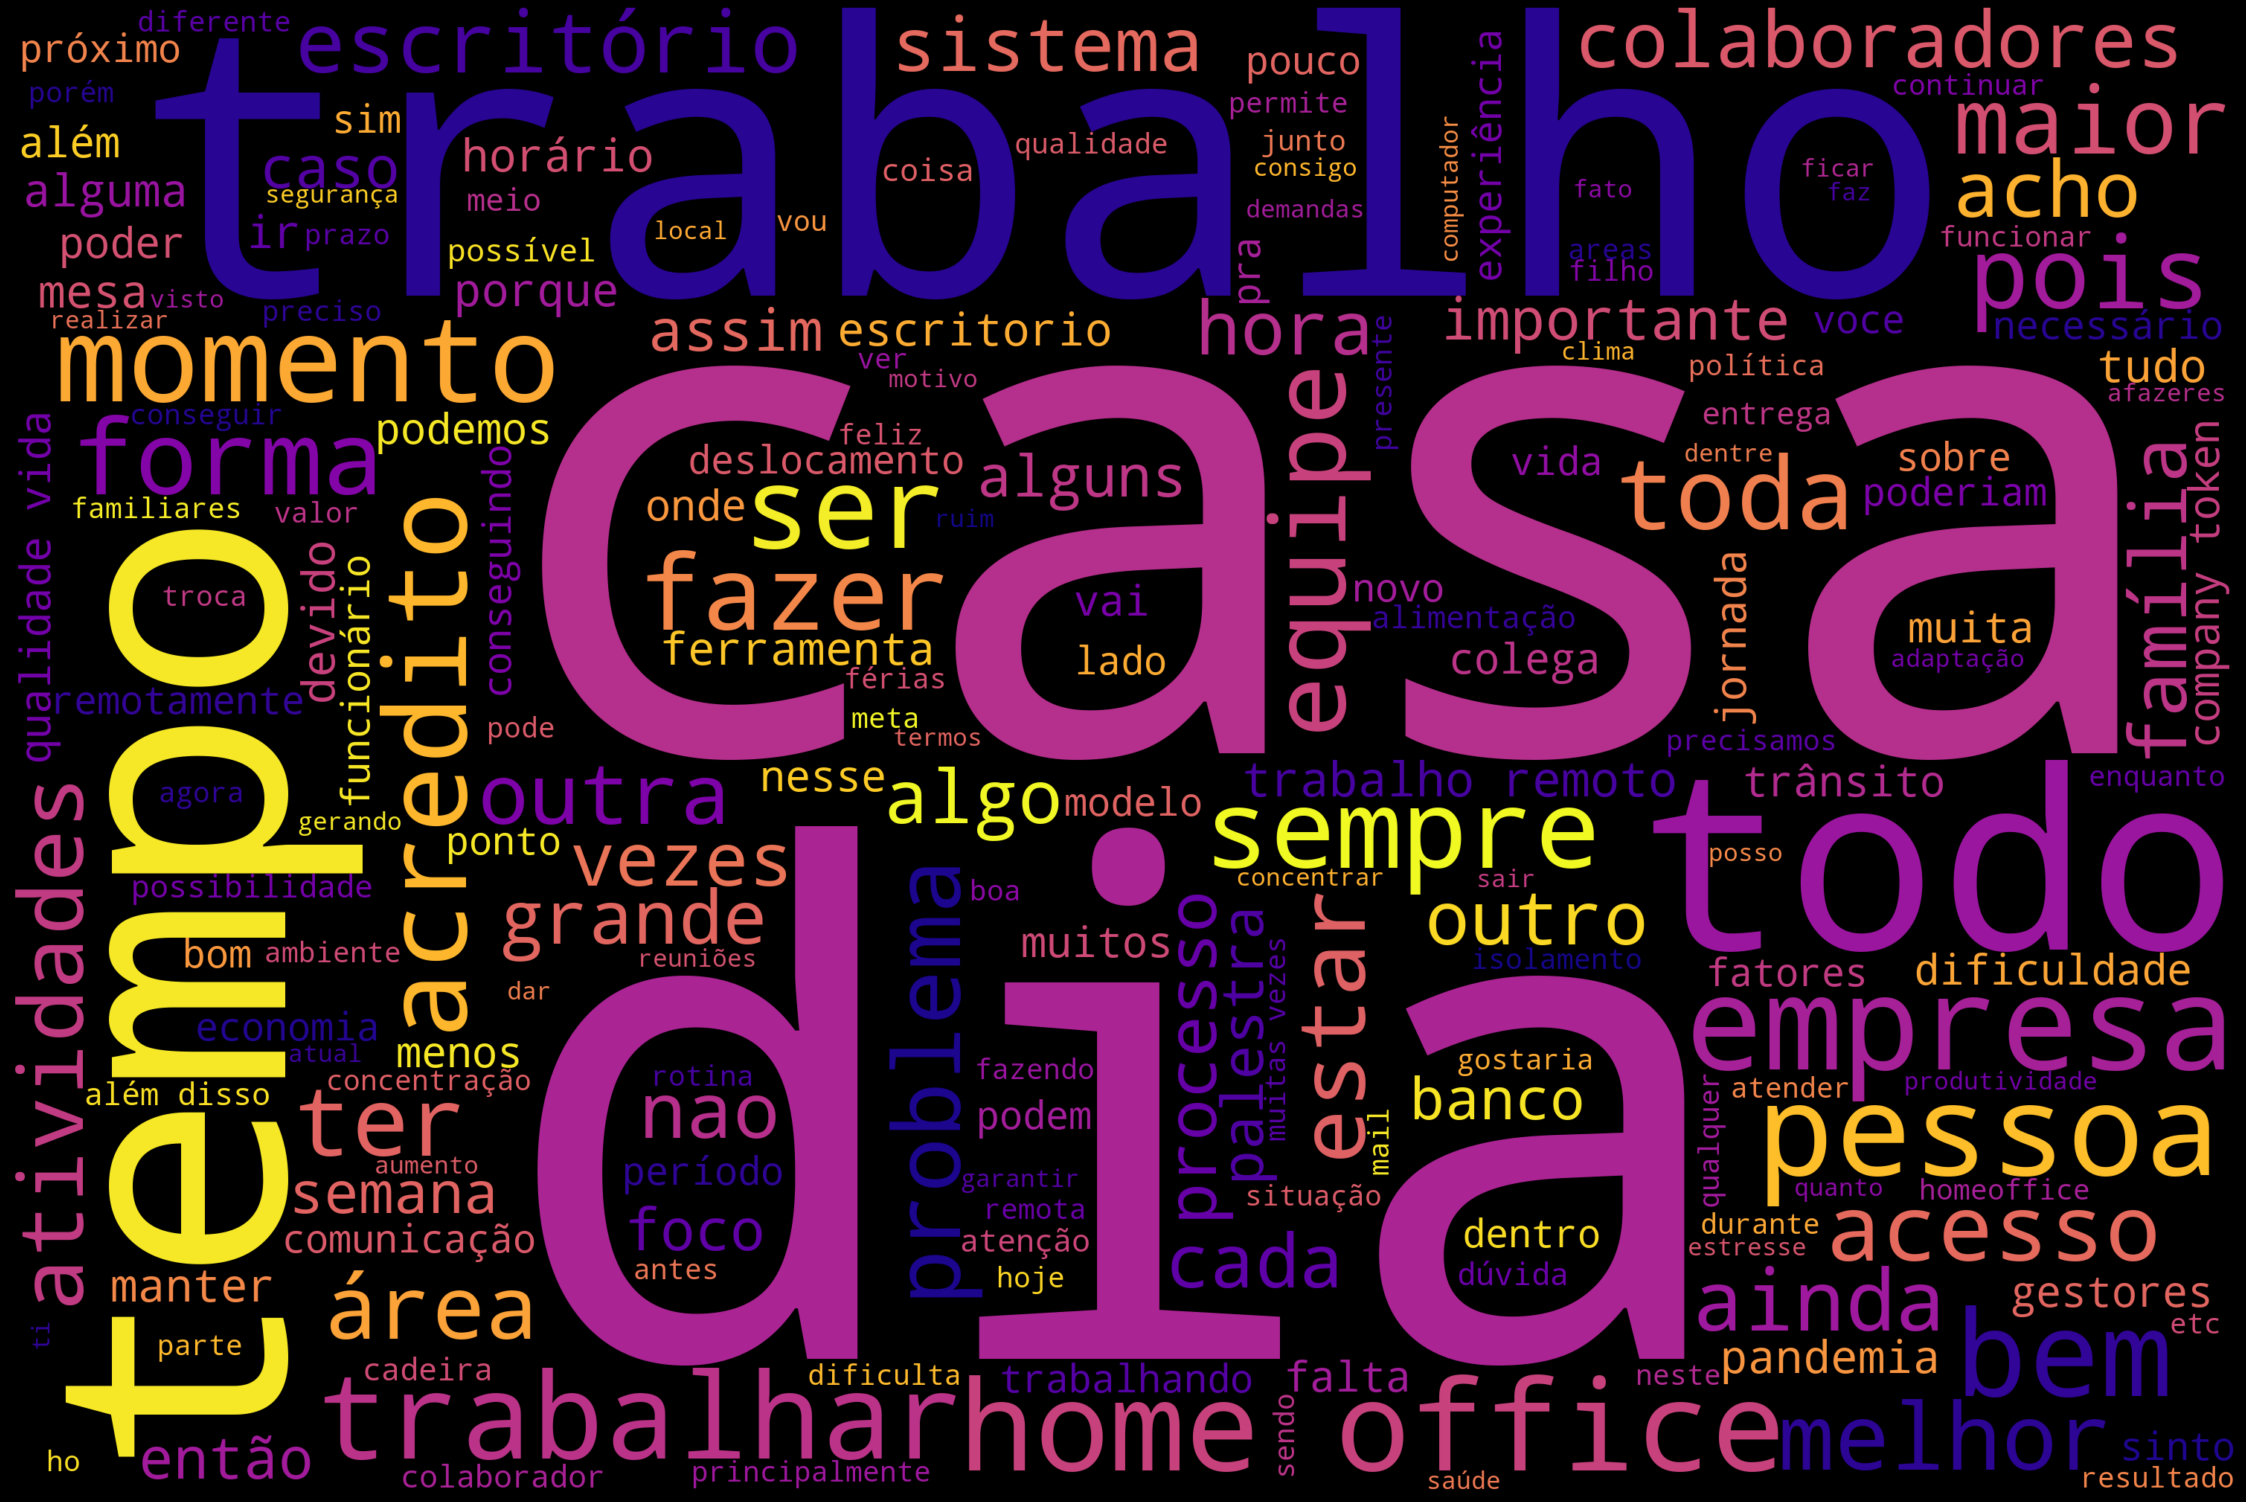

In [16]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="plasma",stopwords=stopwords).generate(str(df["semPontuação"][df["tamanho"]>=51][df["tamanho"]<=119].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

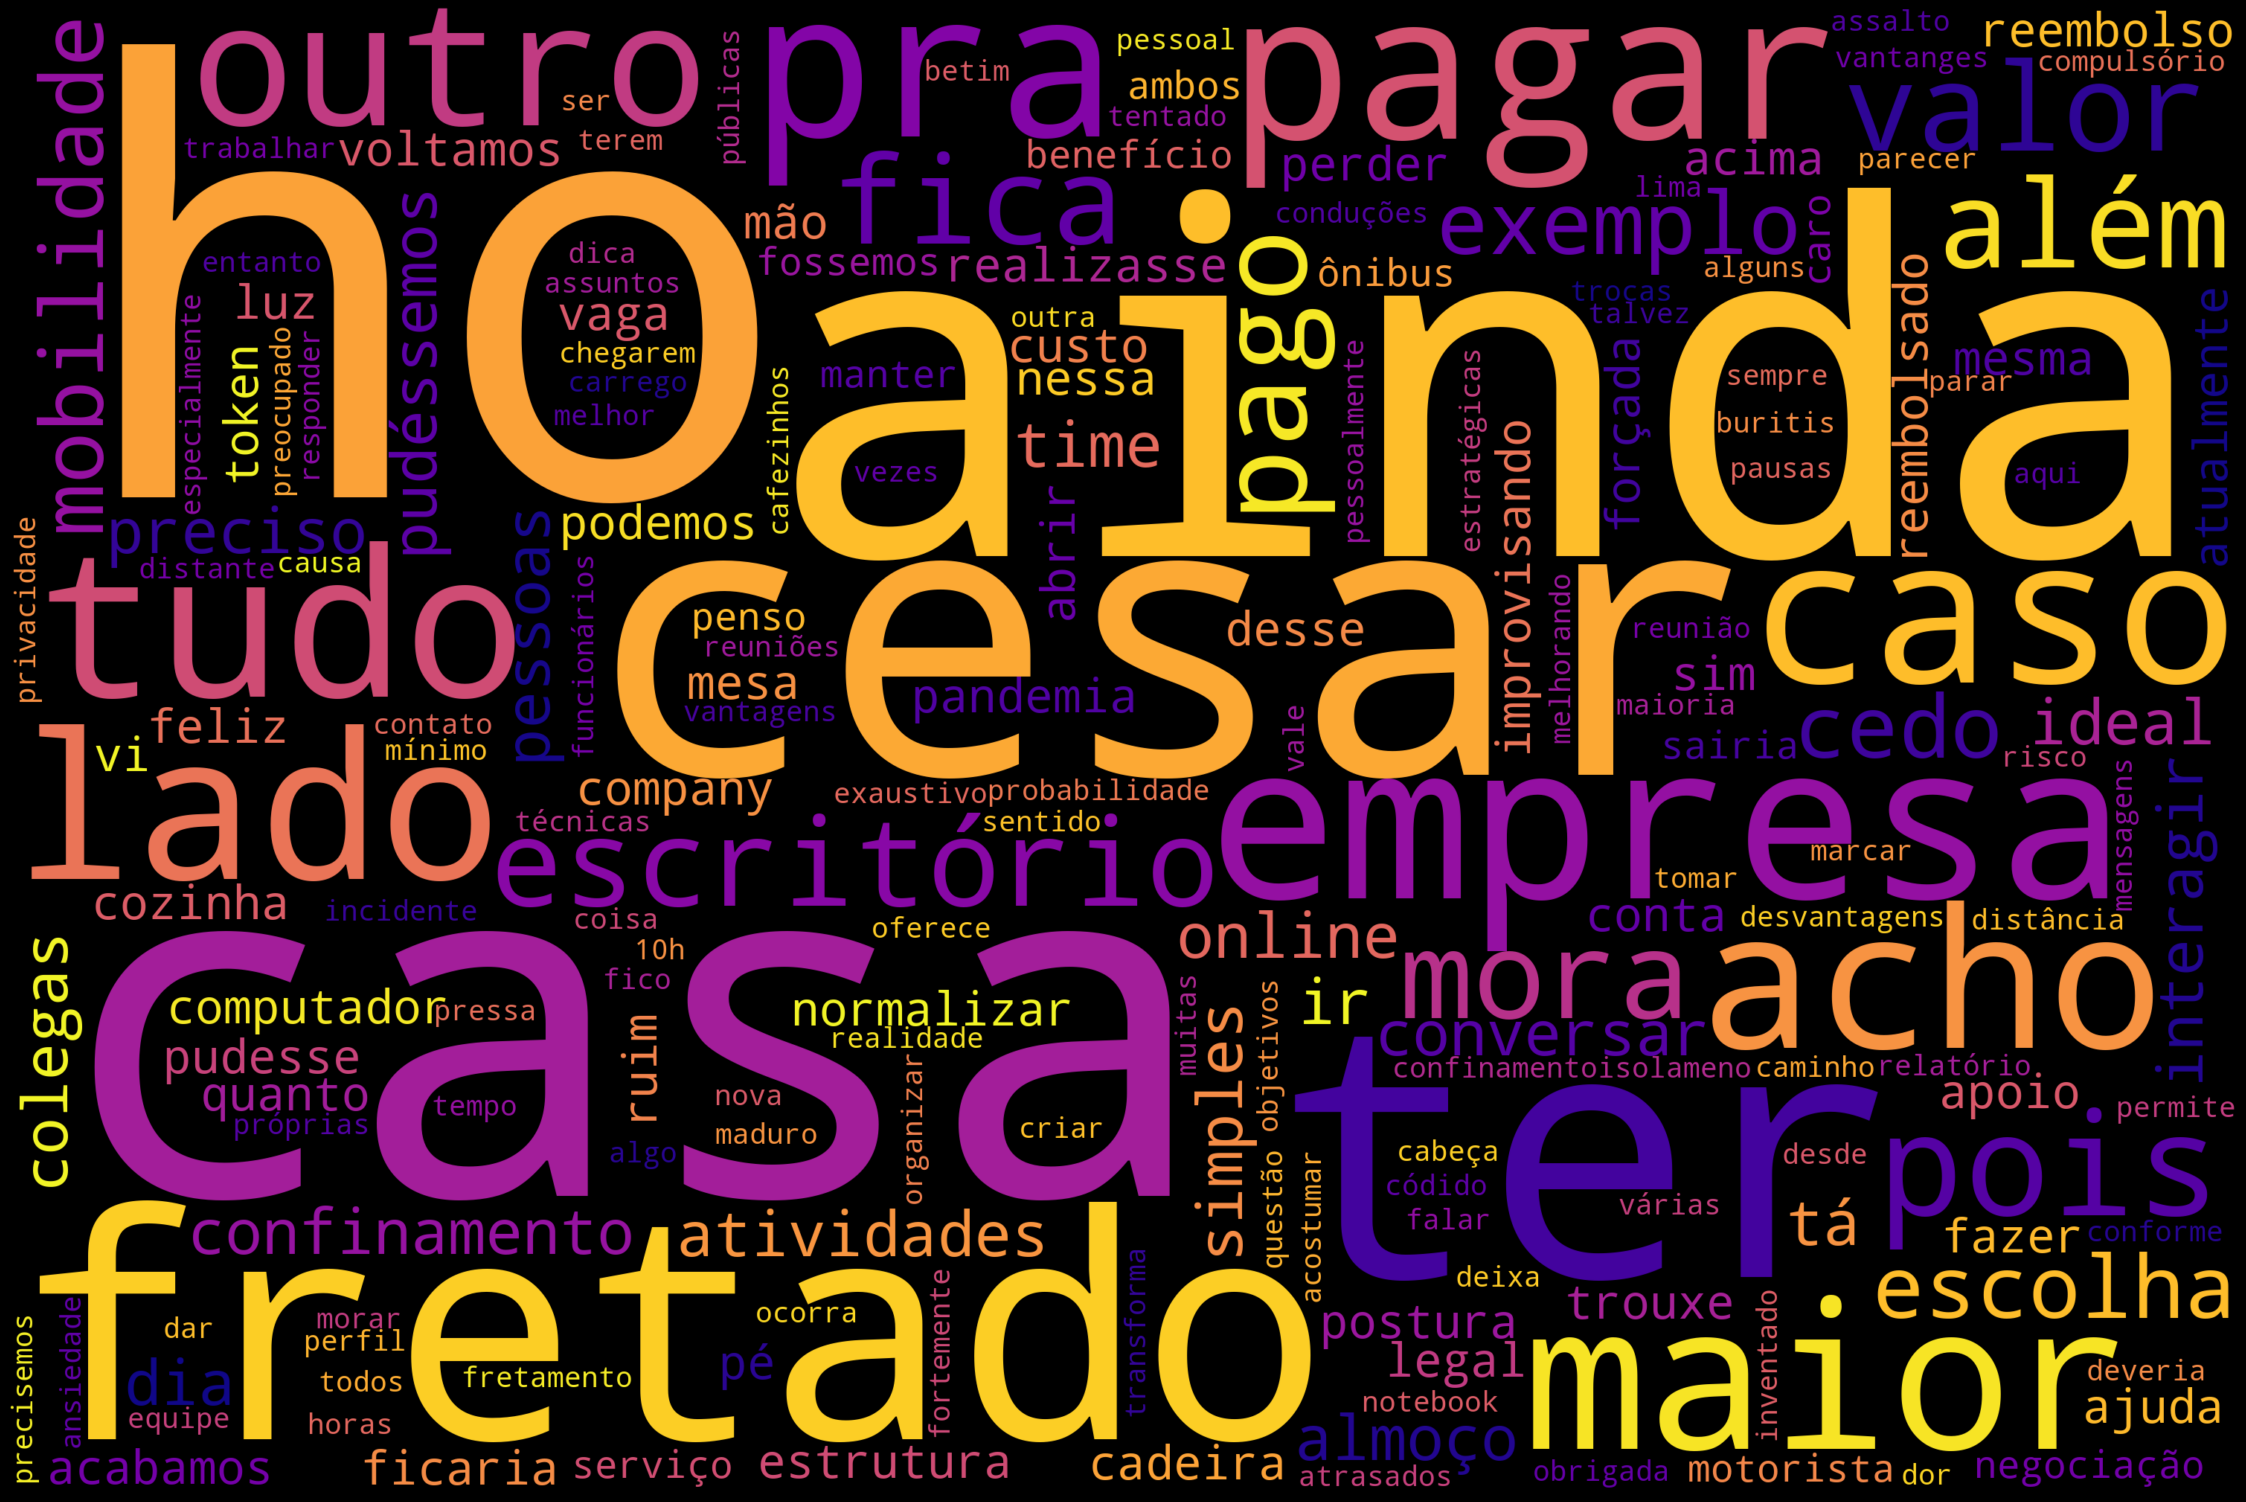

In [17]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="plasma",stopwords=stopwords).generate(str(df["semPontuação"][df["tamanho"]>=119][df["tamanho"]<=204].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Textos menores possuem mais palavras de satisfação e de conformação como podemos verificar, palavras como **confortável, bem, satisfação, melhores, etc.**.

Apesar de verificarmos algumas palavras negativas as palavras mais recorrentes aparecem em maior quantidade para os textos com 51 palavras ou menos.

Podemos dizer até aqui que os textos que expressam insatisfação são maiores do que os feitos por pessoas satisfeitas ou conformadas, eu me arrisco a dizer usando como parametro uma observação pessoal de que os textos de reclamação são mais bem estruturados a fim de transmitir toda angustia e insatisfação para que eu seja compreendido, isso pode ser um comportamento humano comum, discursões ou resenhas negativas são mais longas do que elogios ou críticas positivas. **Ressaltando que isso é uma observação pessoal e não pesquisei em nenhuma fonte.**




# Análise de Sentimentos #

Nesse passo busco compreender a relação entre satisfação e tamanho dos textos a partir da **NLP**.

Para isso usarei a biblioteca TextBlob e algumas de suas ferramentas. Vi em alguns livros e vídeos pessoas usando a nltk para tal, no entanto, essa biblioteca funciona melhor para análise de textos em inglês e não obtive sucesso ao instalar alguns tradutores ou métodos necessários para execução do modelo.

Ao tentar utilizar o método **TextBlob.translate(to="en")** em um determinado momento me foi retornado o erro de requisição **textblob HTTP Error 429: Too Many Requests**, pois a API usada pela classe possui um valor limitado de requisições a cada 24h.

Recorri à outras bibliotecas e encontrei o **from googletrans import Translator** que permite a tradução de strings utilizando API gratuíta do Google Translate, no entanto, o tempo de processamento é muito alto, estimei uma média de 2s para cada texto médio traduzido o que implicava em mais de uma hora para processar os 2000 textos.

Por isso realizei a análise utilizando a lingua original dos textos.

In [18]:
# TextBlob nos retorna um objeto do tipo TextBlob e podemos associá-lo aos métodos sentiment, translate:

TextBlob("no meu caso que sou oriundo embratel minha base de trabalho é campinas perdemos muito tempo com deslocamento diario nesse trajeto campinas x são paulo agora com o acesso a vpn temos todo acesso necessario para desempenhar o trabalho").sentiment

Sentiment(polarity=-0.8, subjectivity=1.0)

In [19]:
TextBlob("conforme já comentei acredito que a empresa pode com mais calma fechar uma política de home office mesmo que parcial porém para que funcione corretamente as melhores ferramentas deverão ser disponibilizadas e deverá ter um trabalho comportamental cultural com todos os colaboradores").sentiment

Sentiment(polarity=0.1, subjectivity=0.1)

## Polaridade ##

A polaridade do texto é compreendido como $|P|\leq 1$.

Textos com $P<0$, $P=0$ e $P>0$ possuem um aspecto negativo, neutro e positivo, respectivamente. Usando o método sentiment.polarity criamos uma nova categoria no Data Set.

In [20]:
# Criar função lambda cuja entrada seja uma string, ela será a entrada do TextBlob e em seguida extraímos a polaridade

Polaridade = lambda x: TextBlob(x).sentiment.polarity

df["polaridade"] = df["semPontuação"].apply(Polaridade)

Em seguida vamos criar mais uma categoria, aqui para facilitar a análise do DataSet vamos classificar os dados de acordo com o seu índice $P$.

In [21]:
df["status"]=df["polaridade"].apply(lambda x: "neutro" if type(x)==np.float and x==0 else x)
df["status"]=df["status"].apply(lambda x: "negativo" if type(x)==np.float and x<0 else x)
df["status"]=df["status"].apply(lambda x: "positivo" if type(x)==np.float and x>0 else x)
df.head()

original  \
0           Satisfação, não deixam nada a desejar...   
1  Não tive dificuldade de me comunicar com outro...   
2  No momento, não estou trabalhando em casa, e s...   
3                                    No momento não.   
4        Qualidade de vinda e rendimento no trabalho   

                                           tokenized  \
0                [satisfação, deixam, nada, desejar]   
1  [dificuldade, comunicar, outros, membros, banc...   
2  [momento, trabalhando, casa, sim, quarentena, ...   
3                                          [momento]   
4           [qualidade, vinda, rendimento, trabalho]   

                                        semPontuação  tamanho  polaridade  \
0                     satisfação deixam nada desejar        4         0.0   
1  dificuldade comunicar outros membros banco sen...       12         0.0   
2  momento trabalhando casa sim quarentena plantã...       10         0.0   
3                                            momento        1         0.0   
4                qualidade vinda rendimento trabalho        4         0.0   

   status  
0  neutro  
1  neutro  
2  neutro  
3  neutro  
4  neutro

## WordCloud de acordo com o status ##

Após realizar a análise de sentimentos vamos verificar a redistribuição de palavras/tópicos relevantes.

### Negativo ###

(-0.5, 2999.5, 1999.5, -0.5)

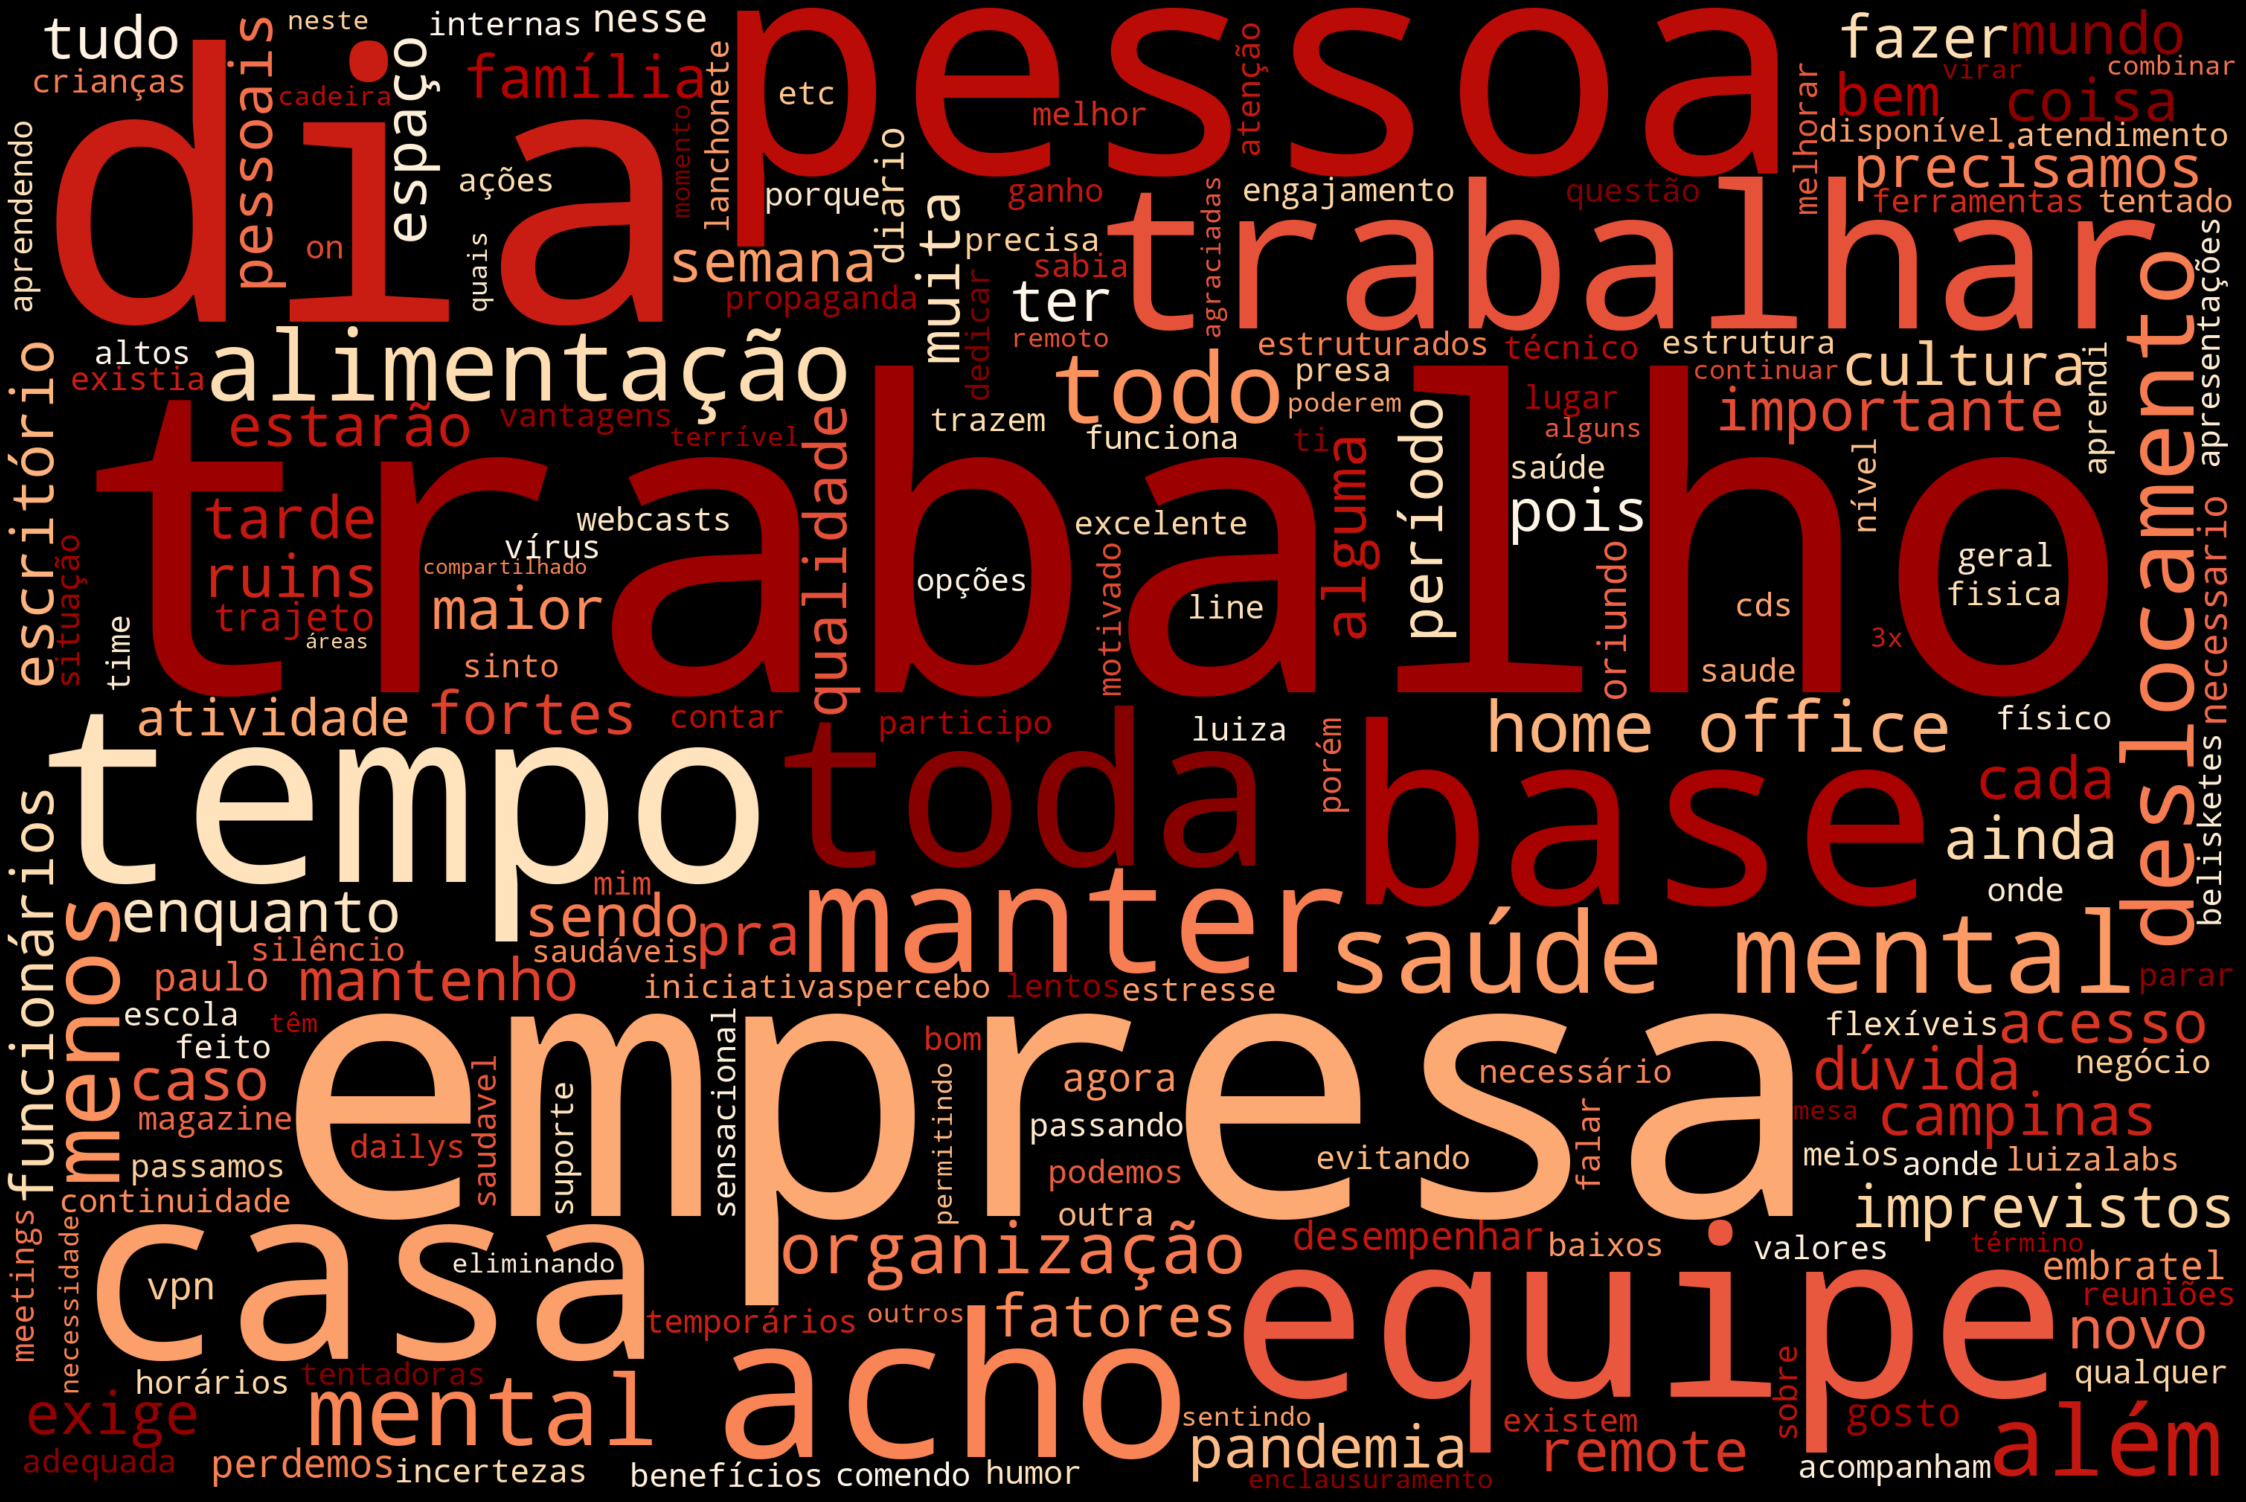

In [22]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="OrRd",stopwords=stopwords).generate(str(df["semPontuação"][df["status"]=="negativo"].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

### Neutro ###

In [23]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="YlGnBu",stopwords=stopwords).generate(str(df["semPontuação"][df["status"]=="neutro"].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

### Positivo ###

(-0.5, 2999.5, 1999.5, -0.5)

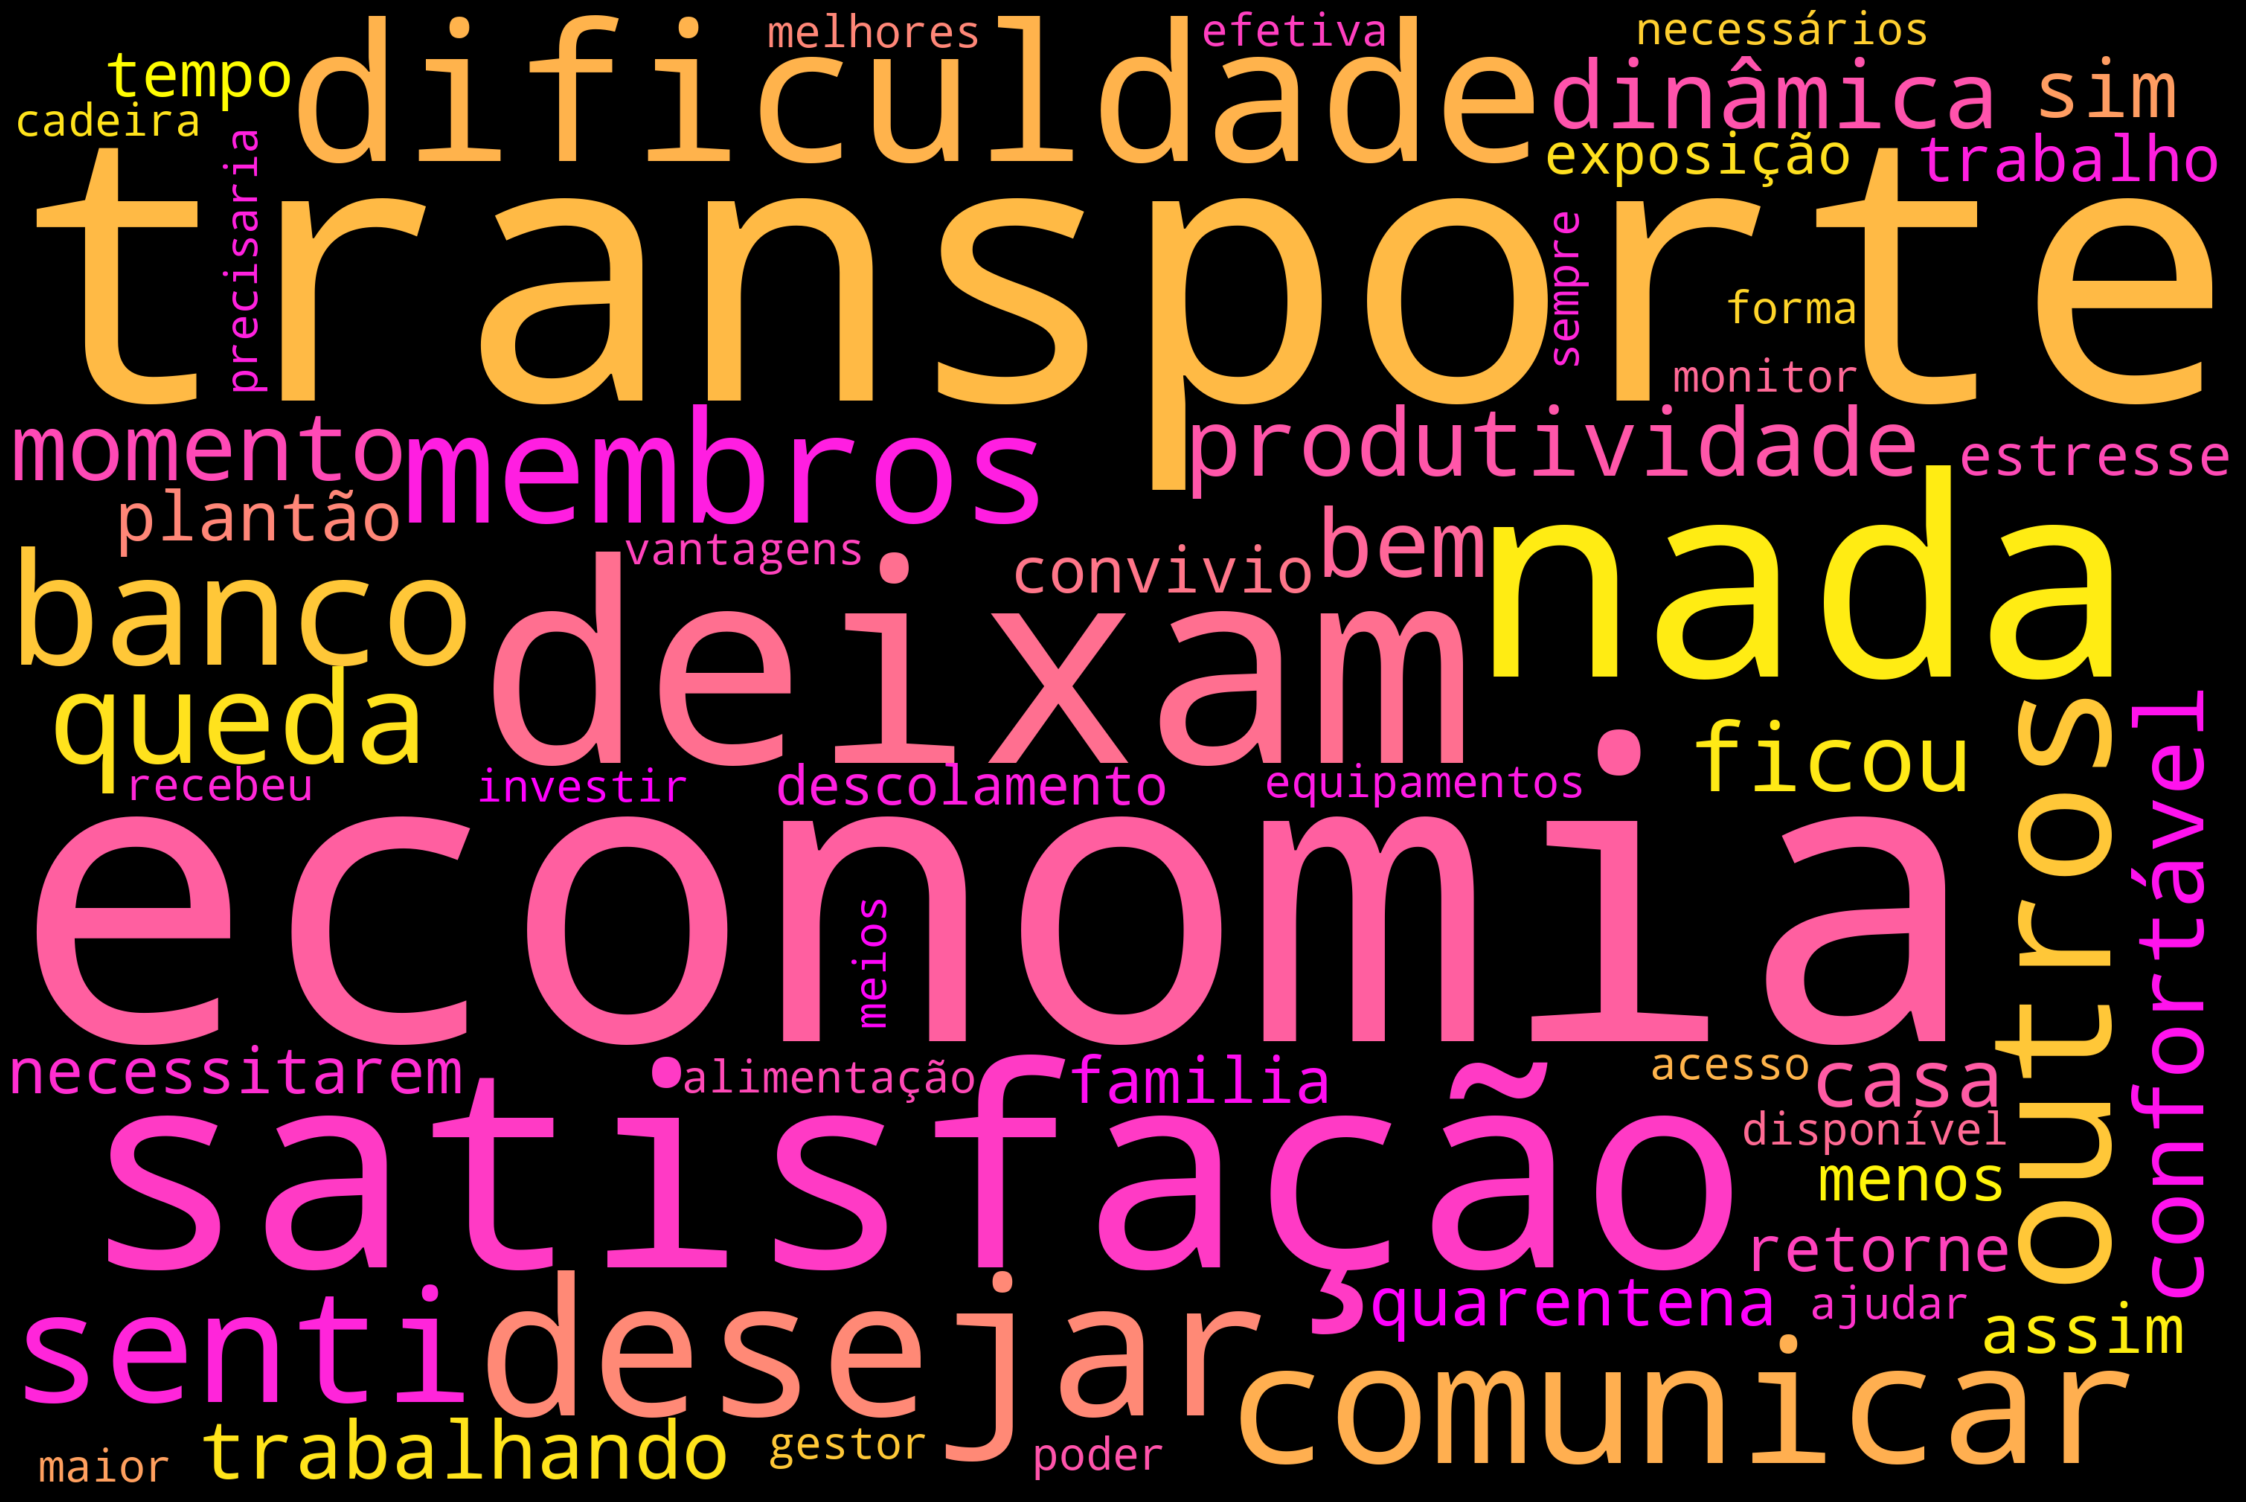

In [24]:
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
wordcloud = WordCloud(width=3000,height=2000,background_color="black",colormap="spring",stopwords=stopwords).generate(str(df["semPontuação"][df["status"]=="neutro"].values).replace("'",""))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

## Análise ##

### Negativos ###

Os textos classificados como negativos possuem alguns tópicos relacionados a: enclausuramento, organização, tempo,  saúde mental, vírus, suporte, pandemia, silêncio, ferramentas, etc.

O que reflete ao momento atual, insegurança coletiva frente à pandemia do COVID-19 e também à situações desconfortáveis, como problemas técnicos, suporte da empresa que pode estar sendo insatisfatório, organização e gestão de tempo, visto que muitas pessoas não estão acostumadas a trabalhar de casa e por ser um ambiente familiar, e por isso não silêncioso, o desempenho no trabalho pode ser prejudicado devido às várias fontes de distração.

### Neutros ##

Os textos classificados como neutros possuem algumas palavras relacionadas a: equipamentos, alimentação, dificuldade, disponibilidade, estresse, quarentena, cadeira, confortável, etc.

Aqui a análise é um pouco mais delicada, visto que um texto classificado como neutro está balanceado, alguns de seus elementos possuem aspecto negativo que é anulada por um peso positivo distribuido igualmente.
Ainda assim podemos verificar que apesar de algumas reclamações como estresse, disponibilidade, equipamentos, cadeiras, etc., há uma grande ocorrência de satisfação, bem estar e produtividade.

### Positivos ###

Os textos classificados como positivos possuem tópicos relacionados a: satisfação, momento, economia, vantagens, melhores, alimentação, confortável, monitor, equipamentos, família, transporte, etc.

O que nos faz refletir sobre os pontos positivos sobre a quarentena e o home office, esses são a economia gerada devido a falta de necessidade de gastar com transporte, vestimenta, alimentação. Além de uma ocorrência comum de produtividade, vantagens, satisfação, indicando um elevado índice de satisfação frente à proximidade com a família e também algum nível de satisfação com o equipamento cedido para trabalho.

# Verificação hipótese: Tamanho texto X status #

No início da análise comentei sobre a hipótese de os textos de pessoas mais insatisfeitas serem maiores em contrapartida dos textos negativos. Podemos verificar essa hipótese usando os dados que obtivemos anteriormente.

## Gráfico de pares ##

Aqui nosso objetivo é verificar a incidência do tamanho das palavras x índice de polaridade a partir de uma análise gráfica.

/home/marcos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


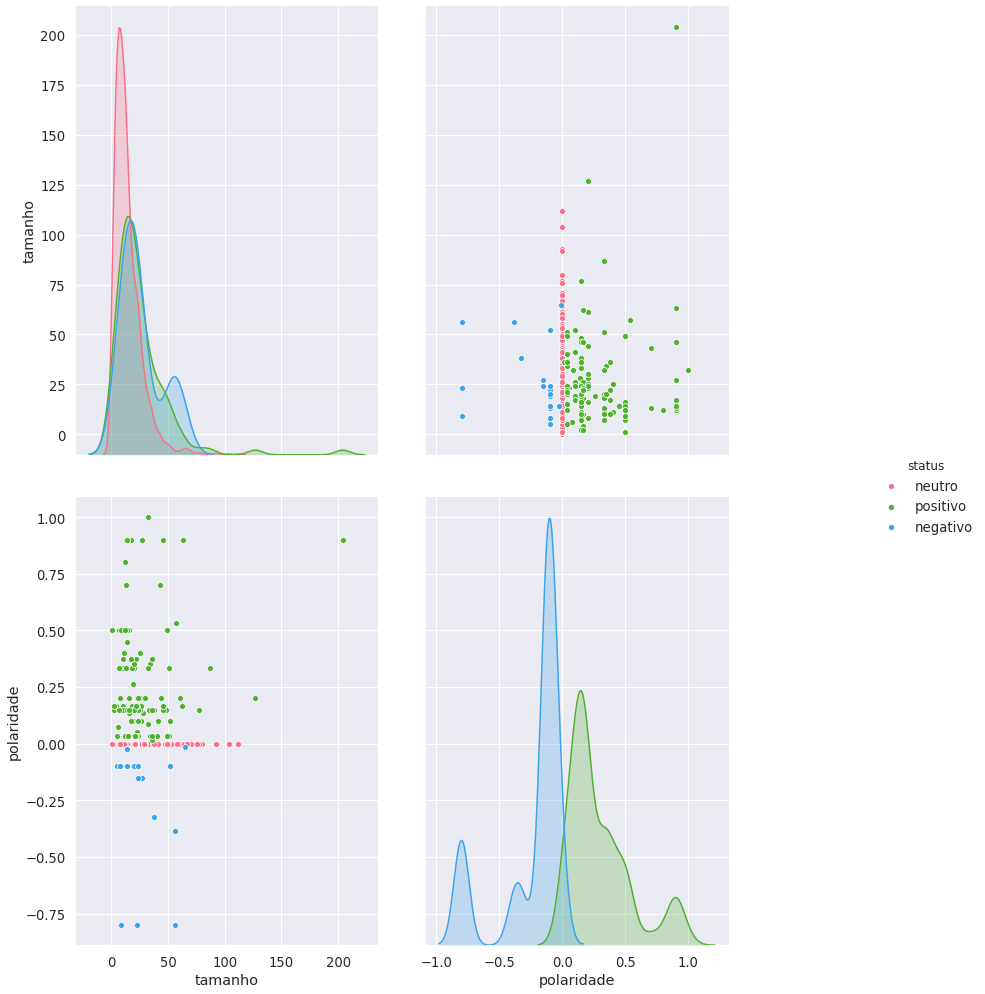

In [25]:
#figure(figsize = (40, 30))
sns.set(font_scale = 1.2)
sns.pairplot(df,hue="status",palette="husl").fig.set_size_inches(15,15)

De acordo com o gráfico acima, o fenômeno de tamanho x polaridade ocorre de forma contrário à hipótese levantada anteriormente, os textos com feedback positivo e neutro possuem mais palavras e mais detalhes enquanto os classificados como negativos.

# Considerações #

A análise foi realizada sem apresentar nenhuma métrica para calculo, que pode ser incrementados pela própria biblioteca do TextBlob ou pela sklearn.
Eu entendo que tive uma semana para realizar essa análise, mas eu estava com a rotina bem restrita na semana passada e só pude começar a trabalhar no projeto de verdade a partir de domingo.

A acurácia do método pode ser otimizada usando algum tradutor para em seguida analisar as frases, isso provocaria uma menor incidência de textos com a polaridade nula e nos permitiria uma análise mais precisa sobre o conteúdo.

Gostei muito de trabalhar com o projeto e de estudar o método, esse foi o meu primeiro modelo de análise de textos e agradeço a oportunidade.

# Referências #

[1] - https://medium.com/@viniljf/criando-um-analisador-de-sentimentos-para-tweets-a53bae0c5147

[2] - https://textblob.readthedocs.io/en/dev/

[3] - https://www.kaggle.com/leandrodoze/sentiment-analysis-in-portuguese

[4] - https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

[5] - https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

[6] - https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d